# 10 Types of Food Classification using CNNs

# Introduction
In this project, we explore the task of food classification using Convolutional Neural Networks (CNNs). The dataset used is Food-101, consisting of images from various food categories. So, we will make classisication for `10` random categories of food.

![foods](https://engineeringhulk.com/wp-content/uploads/2023/05/Classification-of-food-1.jpg)

Let's ger started!

# Getting the Environment Ready

In [1]:
!pip install pyforest
!pip install -U keras-tuner

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=f1251303857ba02facb00d72ccce7a7f38227f6808740d3550a59133b9519e06
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest
  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.5 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.3.5
    Uninstalling keras-tuner-1.3.5:
      Successfully uninstalled keras-tuner-1.3.5


In [2]:
import pyforest
import random
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.image as mpim
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import keras_tuner as kt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Exploration

### Selected Classes
We randomly selected 10 classes from the Food-101 dataset for our classification task. These classes are:

In [3]:
# Access the directory
data_dir = '/kaggle/input/food-101/food-101/food-101/images'
class_names_file_path = '/kaggle/input/food-101/food-101/food-101/meta/classes.txt'

# Read class names from the file into a list
with open(class_names_file_path, 'r') as file:
    all_class_names = [line.strip() for line in file]

# Choose 10 classes randomly
chosen_classes = random.sample(all_class_names, 10)
print(chosen_classes)

# List of real class names
classes = chosen_classes

# Set the number of classes
num_classes = len(classes)

['chocolate_mousse', 'baklava', 'spaghetti_carbonara', 'foie_gras', 'shrimp_and_grits', 'lobster_bisque', 'beet_salad', 'fried_rice', 'waffles', 'fried_calamari']


### Data Visualization
We display a random image from each selected class to get an overview of the dataset.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

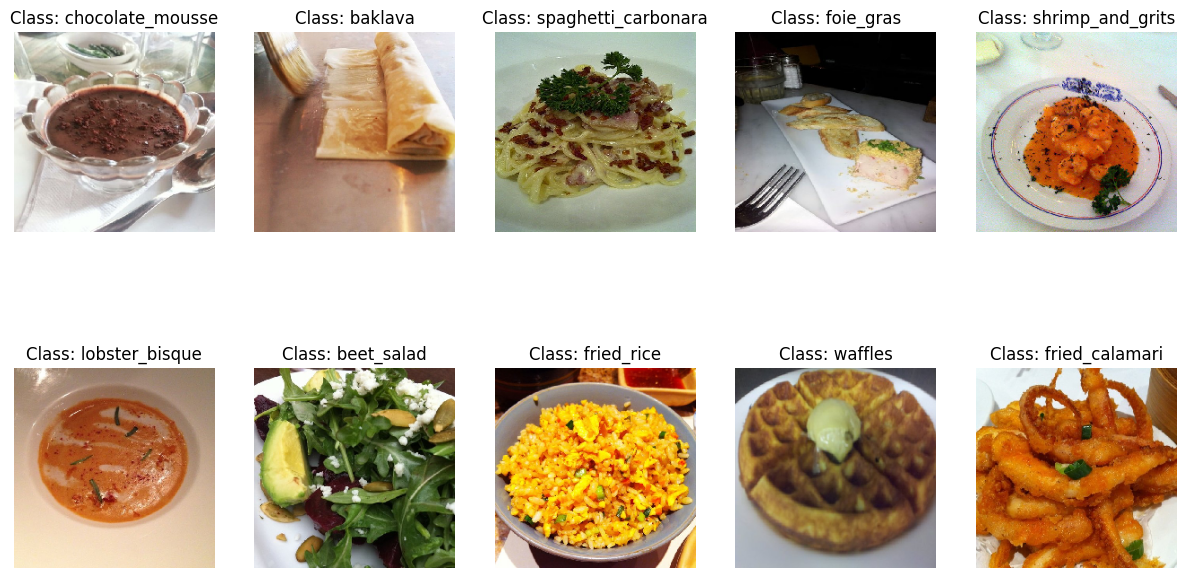

In [4]:
# Display a random image from each class folder
plt.figure(figsize=(15, 8))
for i in range(num_classes):
    class_folder = classes[i]
    class_path = os.path.join(data_dir, class_folder)
    
    # Get a random image from the class folder
    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)
    
    # Load and display the image
    img = load_img(image_path, target_size=(224, 224))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {class_folder}")
    plt.axis('off')

plt.show()

## Baseline CNN Model
We started with a simple Convolutional Neural Network model with the following architecture:
- Conv2D layers with ReLU activation
- MaxPooling2D layers
- Flatten layer
- Dense layers with ReLU activation and Dropout
- Output layer with softmax activation

In [5]:
# Create a sequential model
model = models.Sequential()

# Add convolutional layers with activation and pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training
The baseline model was trained on the dataset with data augmentation using ImageDataGenerator. Early stopping was employed to prevent overfitting.

In [6]:
# Data Augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split the data into training and validation
)

batch_size = 32

# Use the same generator for both training and validation
generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # For training data
    classes=classes
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # For validation data
    classes=classes
)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/20
250/250 [==============================] - 190s 716ms/step - loss: 2.2898 - accuracy: 0.1500 - val_loss: 2.1894 - val_accuracy: 0.1890
Epoch 2/20
250/250 [==============================] - 125s 501ms/step - loss: 2.1311 - accuracy: 0.2044 - val_loss: 2.1248 - val_accuracy: 0.2070
Epoch 3/20
250/250 [==============================] - 125s 499ms/step - loss: 2.0436 - accuracy: 0.2499 - val_loss: 1.9602 - val_accuracy: 0.3015
Epoch 4/20
250/250 [==============================] - 125s 500ms/step - loss: 1.9892 - accuracy: 0.2763 - val_loss: 1.9561 - val_accuracy: 0.2985
Epoch 5/20
250/250 [==============================] - 126s 503ms/step - loss: 1.9279 - accuracy: 0.3069 - val_loss: 1.8862 - val_accuracy: 0.3375
Epoch 6/20
250/250 [==============================] - 124s 497ms/step - loss: 1.8852 - accuracy: 0.3268 - val_loss: 1.8715 - val_accuracy: 0.3480
Epoch 7/20
250/250 [==================

### Model Evaluation
We evaluate the baseline model on the validation set and visualize the performance metrics.

In [7]:
# Evaluate the model on the validation set
evaluation = model.evaluate(validation_generator)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

63/63 [==============================] - 26s 411ms/step - loss: 1.2709 - accuracy: 0.5650
Loss: 1.2709221839904785
Accuracy: 0.5649999976158142


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

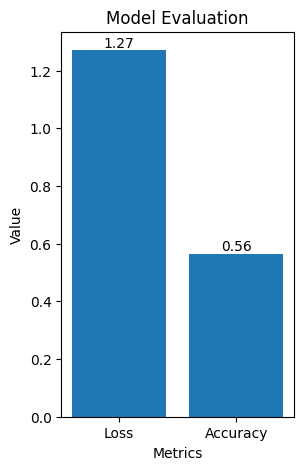

In [8]:
# Visualize the evaluation metrics with data labels
plt.figure(figsize=(3, 5))
bars = plt.bar(['Loss', 'Accuracy'], [evaluation[0], evaluation[1]])

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Model Evaluation')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

### Training History Visualization
We visualize the training and validation loss, as well as accuracy, over epochs.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

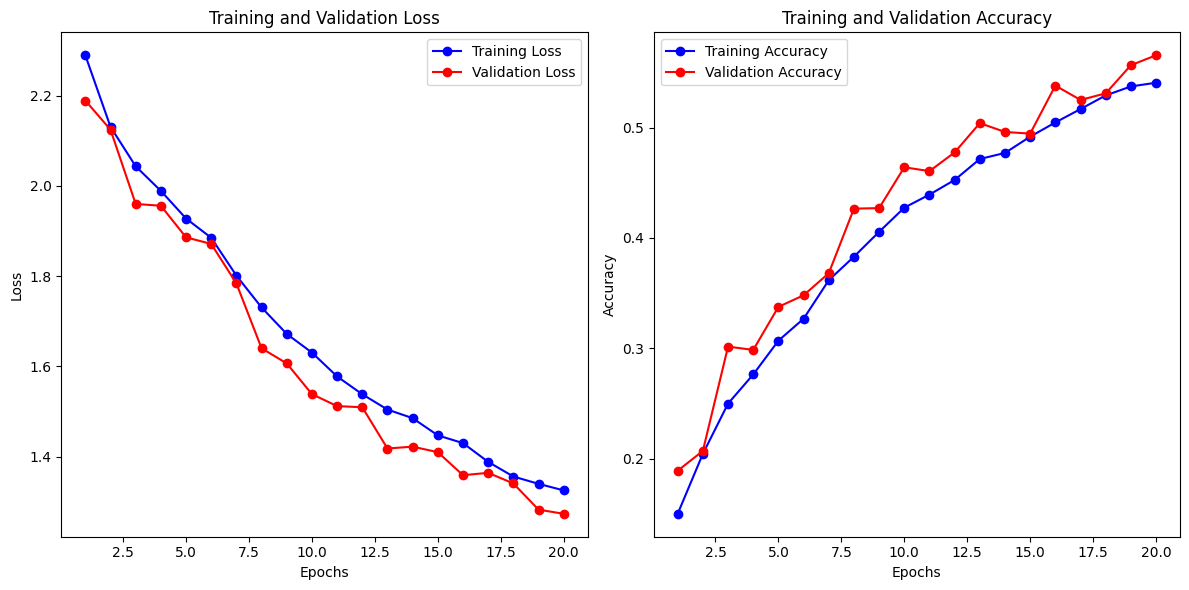

In [9]:
# Visualize the training history (loss and accuracy over epochs)
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter Tuning with Keras Tuner
To improve the model performance, we employed Keras Tuner to search for optimal hyperparameters.

In [10]:
# Instantiate the VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Define a model-building function
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='tuner_dir',
    project_name='food_classification'
)

# Search for the best hyperparameters
tuner.search(
    generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping],
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 04m 33s]
val_accuracy: 0.5559999942779541

Best val_accuracy So Far: 0.6399999856948853
Total elapsed time: 00h 22m 51s


### Search for Hyperparameters
We used Keras Tuner's Hyperband algorithm to search for the best hyperparameters.

In [11]:
# Print the best hyperparameters
print(f"Best Hyperparameters:\n{best_hps.values}")

Best Hyperparameters:
{'dropout': 0.0, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


In [12]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model with the best hyperparameters
history_best_model = best_model.fit(
    generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Save the best model and its weights
best_model.save('best_model.h5')

Epoch 1/20
250/250 [==============================] - 135s 536ms/step - loss: 1.5559 - accuracy: 0.5236 - val_loss: 1.1653 - val_accuracy: 0.6125
Epoch 2/20
250/250 [==============================] - 132s 527ms/step - loss: 1.0838 - accuracy: 0.6424 - val_loss: 1.1979 - val_accuracy: 0.5960
Epoch 3/20
250/250 [==============================] - 131s 522ms/step - loss: 0.9869 - accuracy: 0.6710 - val_loss: 1.0712 - val_accuracy: 0.6475
Epoch 4/20
250/250 [==============================] - 132s 527ms/step - loss: 0.9242 - accuracy: 0.6919 - val_loss: 0.9861 - val_accuracy: 0.6580
Epoch 5/20
250/250 [==============================] - 134s 538ms/step - loss: 0.8836 - accuracy: 0.7050 - val_loss: 1.0246 - val_accuracy: 0.6590
Epoch 6/20
250/250 [==============================] - 131s 525ms/step - loss: 0.8366 - accuracy: 0.7188 - val_loss: 0.9832 - val_accuracy: 0.6810
Epoch 7/20
250/250 [==============================] - 132s 529ms/step - loss: 0.8282 - accuracy: 0.7218 - val_loss: 1.0090 -

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Evaluate the best model on the validation set
evaluation = best_model.evaluate(validation_generator)
print("Best Model Validation Loss:", evaluation[0])
print("Best Model Validation Accuracy:", evaluation[1])

63/63 [==============================] - 26s 416ms/step - loss: 1.0175 - accuracy: 0.6775
Best Model Validation Loss: 1.0175092220306396
Best Model Validation Accuracy: 0.6775000095367432


In [14]:
# Predictions on the validation set using the best model
y_true = validation_generator.classes
y_pred_probs = best_model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_true, y_pred)
print("Validation Accuracy with Best Model:", validation_accuracy)

63/63 [==============================] - 25s 400ms/step


<IPython.core.display.Javascript object>

Validation Accuracy with Best Model: 0.1065


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

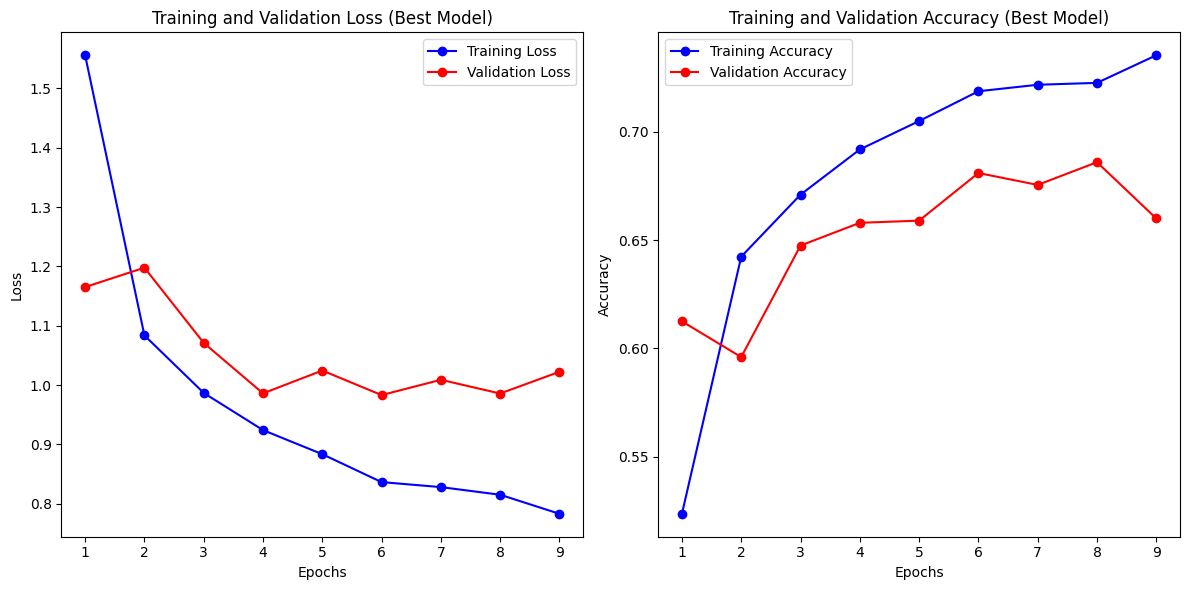

In [15]:
# Visualize the training history for the best model
history_dict_best_model = history_best_model.history

loss_values_best_model = history_dict_best_model['loss']
val_loss_values_best_model = history_dict_best_model['val_loss']
acc_values_best_model = history_dict_best_model['accuracy']
val_acc_values_best_model = history_dict_best_model['val_accuracy']

epochs_best_model = range(1, len(loss_values_best_model) + 1)

plt.figure(figsize=(12, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_best_model, loss_values_best_model, 'bo-', label='Training Loss')
plt.plot(epochs_best_model, val_loss_values_best_model, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (Best Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_best_model, acc_values_best_model, 'bo-', label='Training Accuracy')
plt.plot(epochs_best_model, val_acc_values_best_model, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Best Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Load the saved model
loaded_model = load_model('best_model.h5')

def predict_and_display(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make predictions
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Display the image with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted Class: {classes[predicted_class]}")
    plt.axis('off')
    plt.show()

<IPython.core.display.Javascript object>

1/1 [==============================] - 1s 783ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

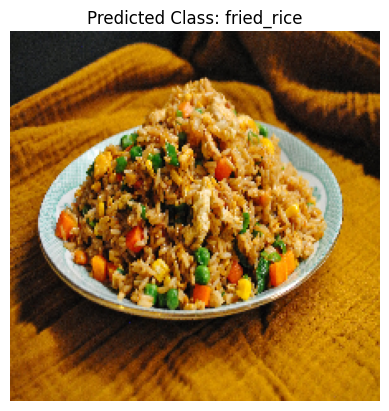

In [17]:
# Example usage
image_path = '/kaggle/input/test-image/rice.jpg'
predict_and_display(image_path)

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 21ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

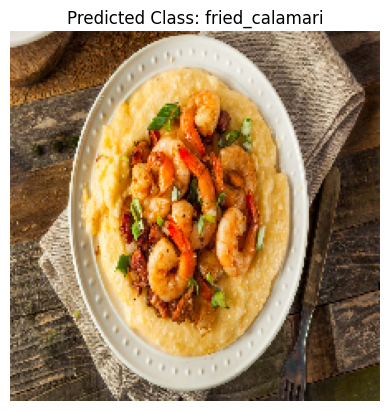

In [18]:
# Example usage
image_path = '/kaggle/input/test-image/shr_gri.jpg'
predict_and_display(image_path)

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 20ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

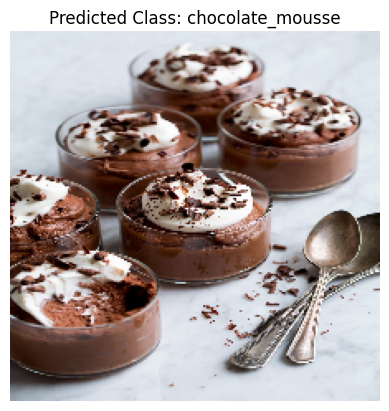

In [19]:
# Example usage
image_path = '/kaggle/input/test-image/cho-mou.jpg'
predict_and_display(image_path)

# conclusion

This project successfully tackled the task of food classification using CNNs. The journey began with the exploration of the Food-101 dataset, where we randomly selected 10 classes for classification. A baseline CNN model was designed and trained, demonstrating good performance on the validation set.

# Made by: Abdelrahman Eldaba